<a href="https://colab.research.google.com/github/ssnikhil1/google_stock_prediction/blob/main/Google_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Google Stock Price Prediction And Forecasting using stacked LSTM-Deep Learning**





In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving trainset.csv to trainset.csv


In [ ]:
import pandas as pd 
import io 
df = pd.read_csv(io.BytesIO(uploaded['trainset.csv'])) 

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving testset.csv to testset (2).csv


In [ ]:
df1 = pd.read_csv(io.BytesIO(uploaded['testset.csv'])) 

df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,1048.339966,1066.939941,1045.229980,1065.000000,1065.000000,1237600
1,2018-01-03,1064.310059,1086.290039,1063.209961,1082.479980,1082.479980,1430200
2,2018-01-04,1088.000000,1093.569946,1084.001953,1086.400024,1086.400024,1004600
3,2018-01-05,1094.000000,1104.250000,1092.000000,1102.229980,1102.229980,1279100
4,2018-01-08,1102.229980,1111.270020,1101.619995,1106.939941,1106.939941,1047600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       125 non-null    object 
 1   Open       125 non-null    float64
 2   High       125 non-null    float64
 3   Low        125 non-null    float64
 4   Close      125 non-null    float64
 5   Adj Close  125 non-null    float64
 6   Volume     125 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 7.0+ KB


In [ ]:
df_train=df.iloc[:,4:5].values
df_test=df1.iloc[:,4:5].values
df_train

array([[ 359.288177],
       [ 359.496826],
       [ 366.600616],
       ...,
       [1049.369995],
       [1048.140015],
       [1046.400024]])

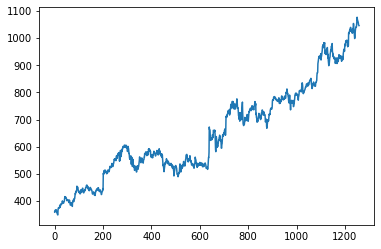

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df_train)

### LSTM is highly sensitive to scale of data

In [ ]:
import numpy as np
from sklearn import preprocessing 
  
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
  
x_train = min_max_scaler.fit_transform(df_train)
x_test=  min_max_scaler.fit_transform(df_test)
x_train

array([[0.01390725],
       [0.01419387],
       [0.02395214],
       ...,
       [0.96185311],
       [0.96016352],
       [0.95777334]])

In [ ]:
#convert an array of vaues into dataset matrix
def create_dataset(data,timestep=1):
  X,Y=[],[]
  for i in range(len(data)-timestep-1):
    a=data[i:(i+timestep),0]
    b=data[i+timestep,0]
    X.append(a)
    Y.append(b)
  return np.array(X),np.array(Y)  

In [ ]:
timestep=60
X_train,Y_train=create_dataset(x_train,timestep)
X_test,Y_test=create_dataset(x_test,timestep)

In [ ]:
print(X_train.shape),print(Y_train.shape)

(1198, 60)
(1198,)


(None, None)

In [ ]:
X_train

array([[0.01390725, 0.01419387, 0.02395214, ..., 0.07475666, 0.06809644,
        0.06231652],
       [0.01419387, 0.02395214, 0.0217548 , ..., 0.06809644, 0.06231652,
        0.06709331],
       [0.02395214, 0.0217548 , 0.02076534, ..., 0.06231652, 0.06709331,
        0.07517972],
       ...,
       [0.83786549, 0.82984329, 0.83605223, ..., 0.98325485, 0.98144168,
        0.97662008],
       [0.82984329, 0.83605223, 0.82765912, ..., 0.98144168, 0.97662008,
        0.97197706],
       [0.83605223, 0.82765912, 0.85276988, ..., 0.97662008, 0.97197706,
        0.96185311]])

In [ ]:
#reshape matrix data to be [sample,timestep,features] which is required for LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
#create the LSTM model
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import LSTM 

In [ ]:
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(60,1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 9s 105ms/step - loss: 0.0647 - val_loss: 0.0571
Epoch 2/100
38/38 [==============================] - 3s 78ms/step - loss: 0.0014 - val_loss: 0.0564
Epoch 3/100
38/38 [==============================] - 3s 77ms/step - loss: 0.0011 - val_loss: 0.0551
Epoch 4/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0011 - val_loss: 0.0551
Epoch 5/100
38/38 [==============================] - 3s 79ms/step - loss: 9.7300e-04 - val_loss: 0.0523
Epoch 6/100
38/38 [==============================] - 3s 78ms/step - loss: 9.4776e-04 - val_loss: 0.0516
Epoch 7/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0011 - val_loss: 0.0488
Epoch 8/100
38/38 [==============================] - 3s 77ms/step - loss: 0.0011 - val_loss: 0.0475
Epoch 9/100
38/38 [==============================] - 3s 78ms/step - loss: 9.3637e-04 - val_loss: 0.0458
Epoch 10/100
38/38 [==============================] - 3s 78ms/step - loss: 8.2043e-04 -

In [ ]:
total_data=pd.concat((df['Close'],df1['Close']),axis=0)
total_data

0       359.288177
1       359.496826
2       366.600616
3       365.001007
4       364.280701
          ...     
120    1124.810059
121    1118.459961
122    1103.979980
123    1114.219971
124    1115.650024
Name: Close, Length: 1384, dtype: float64

In [ ]:
X_test=total_data[len(total_data)-len(df_test)-60:].values
X_test

array([ 969.960022,  978.890015,  977.      ,  972.599976,  989.25    ,
        987.830017,  989.679993,  992.      ,  992.179993,  992.809998,
        984.450012,  988.200012,  968.450012,  970.539978,  973.330017,
        972.559998, 1019.27002 , 1017.109985, 1016.640015, 1025.5     ,
       1025.579956, 1032.47998 , 1025.900024, 1033.329956, 1039.849976,
       1031.26001 , 1028.069946, 1025.75    , 1026.      , 1020.909973,
       1032.5     , 1019.090027, 1018.380005, 1034.48999 , 1035.959961,
       1040.609985, 1054.209961, 1047.410034, 1021.659973, 1021.409973,
       1010.169983,  998.679993, 1005.150024, 1018.380005, 1030.930054,
       1037.050049, 1041.099976, 1040.47998 , 1040.609985, 1049.150024,
       1064.189941, 1077.140015, 1070.680054, 1064.949951, 1063.630005,
       1060.119995, 1056.73999 , 1049.369995, 1048.140015, 1046.400024,
       1065.      , 1082.47998 , 1086.400024, 1102.22998 , 1106.939941,
       1106.26001 , 1102.609985, 1105.52002 , 1122.26001 , 1121.

In [ ]:
X_test=X_test.reshape(-1,1)
X_test


array([[ 969.960022],
       [ 978.890015],
       [ 977.      ],
       [ 972.599976],
       [ 989.25    ],
       [ 987.830017],
       [ 989.679993],
       [ 992.      ],
       [ 992.179993],
       [ 992.809998],
       [ 984.450012],
       [ 988.200012],
       [ 968.450012],
       [ 970.539978],
       [ 973.330017],
       [ 972.559998],
       [1019.27002 ],
       [1017.109985],
       [1016.640015],
       [1025.5     ],
       [1025.579956],
       [1032.47998 ],
       [1025.900024],
       [1033.329956],
       [1039.849976],
       [1031.26001 ],
       [1028.069946],
       [1025.75    ],
       [1026.      ],
       [1020.909973],
       [1032.5     ],
       [1019.090027],
       [1018.380005],
       [1034.48999 ],
       [1035.959961],
       [1040.609985],
       [1054.209961],
       [1047.410034],
       [1021.659973],
       [1021.409973],
       [1010.169983],
       [ 998.679993],
       [1005.150024],
       [1018.380005],
       [1030.930054],
       [10

In [ ]:
X_test=min_max_scaler.fit_transform(X_test)
X_test

array([[0.00728102],
       [0.05033996],
       [0.04122663],
       [0.02001044],
       [0.1002941 ],
       [0.09344717],
       [0.10236745],
       [0.11355414],
       [0.11442204],
       [0.11745982],
       [0.07714935],
       [0.09523123],
       [0.        ],
       [0.01007747],
       [0.02353058],
       [0.01981767],
       [0.24504566],
       [0.23463033],
       [0.23236421],
       [0.27508559],
       [0.27547113],
       [0.3087419 ],
       [0.27701444],
       [0.31284034],
       [0.3442788 ],
       [0.3028594 ],
       [0.28747744],
       [0.27629105],
       [0.27749651],
       [0.25295324],
       [0.30883843],
       [0.24417776],
       [0.24075415],
       [0.31843383],
       [0.32552179],
       [0.34794344],
       [0.41352027],
       [0.38073214],
       [0.25656962],
       [0.25536416],
       [0.20116679],
       [0.14576396],
       [0.17696138],
       [0.24075415],
       [0.30126841],
       [0.33077801],
       [0.35030609],
       [0.347

In [ ]:
X_test,Y_test=create_dataset(X_test,60)
X_test.shape

(124, 60)

In [ ]:
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
#lets predict
test_predict=model.predict(X_test)

In [ ]:
#transform back to original scale
test_predict=min_max_scaler.inverse_transform(test_predict)

In [ ]:
test_predict

array([[1047.8627 ],
       [1064.6876 ],
       [1084.3204 ],
       [1088.6301 ],
       [1102.0623 ],
       [1106.1531 ],
       [1104.4856 ],
       [1101.0345 ],
       [1105.3112 ],
       [1123.2205 ],
       [1120.593  ],
       [1132.0046 ],
       [1128.4106 ],
       [1138.2539 ],
       [1156.4298 ],
       [1167.4674 ],
       [1159.8016 ],
       [1170.9377 ],
       [1175.1018 ],
       [1174.3756 ],
       [1162.136  ],
       [1174.6887 ],
       [1167.4368 ],
       [1097.3279 ],
       [1057.5771 ],
       [1094.4453 ],
       [1053.4071 ],
       [1015.17834],
       [1034.4622 ],
       [1054.132  ],
       [1059.6248 ],
       [1073.852  ],
       [1093.6628 ],
       [1098.9761 ],
       [1103.4365 ],
       [1110.7628 ],
       [1105.1615 ],
       [1125.9691 ],
       [1142.224  ],
       [1112.9158 ],
       [1105.0262 ],
       [1068.6478 ],
       [1085.1803 ],
       [1098.1368 ],
       [1100.2792 ],
       [1114.3094 ],
       [1129.624  ],
       [1160.

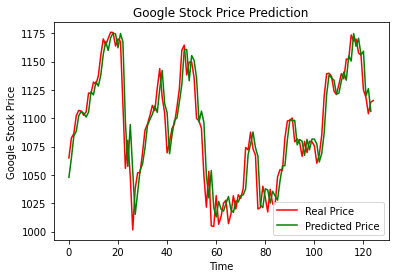

In [ ]:
#Plotting
plt.plot(df_test,color = 'red', label = 'Real Price')
plt.plot(test_predict, color = 'green', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()